# Face Analysis with UniFace

This notebook demonstrates comprehensive face analysis using the **FaceAnalyzer** class.

## 1. Install UniFace


In [ ]:
%pip install -q uniface


## 2. Import Libraries


In [15]:
import cv2
import matplotlib.pyplot as plt

from uniface import FaceAnalyzer, RetinaFace, ArcFace, AgeGender
from uniface.visualization import draw_detections


In [16]:
analyzer = FaceAnalyzer(
    detector=RetinaFace(),
    recognizer=ArcFace(),
    age_gender=AgeGender()
)


✓ Model loaded (CoreML (Apple Silicon))
✓ Model loaded (CoreML (Apple Silicon))
✓ Model loaded (CoreML (Apple Silicon))


In [17]:
image_paths = [
    '../assets/test_images/image0.jpg',
    '../assets/test_images/image1.jpg',
    '../assets/test_images/image2.jpg',
]

results = []

for image_path in image_paths:
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print(f'Error: Could not read {image_path}')
        continue

    # Analyze faces
    faces = analyzer.analyze(image)

    print(f'\n{image_path}: Detected {len(faces)} face(s)')
    for i, face in enumerate(faces, 1):
        print(f'  Face {i}: {face.gender}, {face.age}y, conf={face.confidence:.3f}')

    # Prepare visualization
    vis_image = image.copy()
    bboxes = [f.bbox for f in faces]
    scores = [f.confidence for f in faces]
    landmarks = [f.landmarks for f in faces]
    draw_detections(vis_image, bboxes, scores, landmarks, vis_threshold=0.5)

    # Add age/gender labels
    for i, face in enumerate(faces, 1):
        x1, y1 = int(face.bbox[0]), int(face.bbox[1])
        text = f'{face.gender}, {face.age}y'
        cv2.putText(vis_image, text, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    results.append((image_path, cv2.cvtColor(vis_image, cv2.COLOR_BGR2RGB), faces))



../assets/test_images/image0.jpg: Detected 1 face(s)
  Face 1: Female, 28y, conf=1.000

../assets/test_images/image1.jpg: Detected 1 face(s)
  Face 1: Female, 29y, conf=1.000

../assets/test_images/image2.jpg: Detected 1 face(s)
  Face 1: Female, 28y, conf=1.000


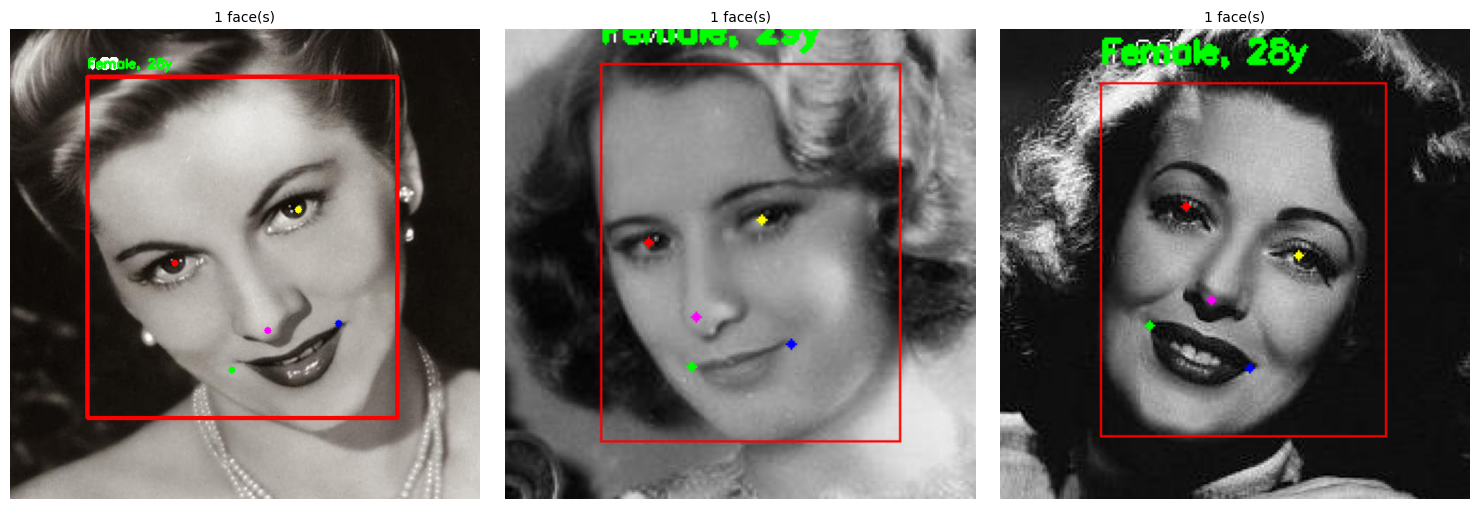

In [18]:
fig, axes = plt.subplots(1, len(results), figsize=(15, 5))

for idx, (path, vis_image, faces) in enumerate(results):
    axes[idx].imshow(vis_image)
    axes[idx].axis('off')
    axes[idx].set_title(f'{len(faces)} face(s)', fontsize=10)

plt.tight_layout()
plt.show()


In [20]:
# Get first face from first image
_, _, faces = results[0]
if faces:
    face = faces[0]

    print('Face Attributes:')
    print(f'  - Bounding box: {face.bbox.astype(int).tolist()}')
    print(f'  - Confidence: {face.confidence:.3f}')
    print(f'  - Landmarks shape: {face.landmarks.shape}')
    print(f'  - Age: {face.age} years')
    print(f'  - Gender string: {face.gender}')
    print(f'  - Embedding shape: {face.embedding.shape}')
    print(f'  - Embedding norm: {face.embedding.shape[0]}D, L2-norm ≈ 1.0')


Face Attributes:
  - Bounding box: [88, 54, 442, 444]
  - Confidence: 1.000
  - Landmarks shape: (5, 2)
  - Age: 28 years
  - Gender string: Female
  - Embedding shape: (1, 512)
  - Embedding norm: 1D, L2-norm ≈ 1.0


## Notes

- `analyzer.analyze()` performs detection, recognition, and attribute prediction in one call
- Gender is returned as integer ID: `0` for Female, `1` for Male
- Use `face.gender` property to get string representation ("Female" or "Male")
- Face embeddings are normalized (L2-norm ≈ 1.0) for similarity computation
- Use `face.compute_similarity(other_face)` to compare faces


In [22]:
face1 = faces[0]

In [23]:
face2 = faces[0]

In [26]:
face1.embedding.shape

(1, 512)

In [27]:
face1.compute_similarity(face2)

0.9999901056289673